In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### **Importing packages:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('titanic train.csv')
test = pd.read_csv('titanic _test.csv')
submission = pd.read_csv('titanic submission.csv')
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
print(f'Submission shape: {submission.shape}')

Train shape: (891, 12)
Test shape: (418, 11)
Submission shape: (418, 2)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Overall Features**

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **EDA**

**Survived:**

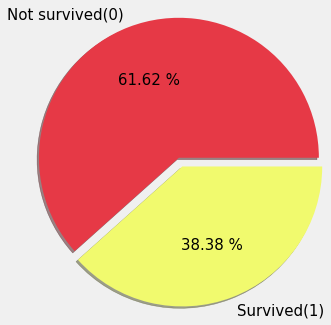

In [6]:
# creating a variable for comparing those two values
X = train.loc[train['Survived']== 0].count()[0]          # count()[0] shows the total value to compare with other
Y = train.loc[train['Survived']== 1].count()[0]        # count()[0] shows the total value to compare with other

# creating a label for generate names for that
labels = ['Not survived(0)', 'Survived(1)']

# To slice the perticuler section
explode = [0.1, 0] 

# Font size of text in pie chart
textprops = {"fontsize":'15'} 

# autopct gives percentage for it & %% gives percentage symbol to it
autopct = '%.2f %%'
plt.style.use("fivethirtyeight")
# drawing pie chart
plt.pie(x=[X,Y], labels=labels,colors=['#E63946', '#F1FA6E'] ,
        autopct=autopct, textprops=textprops, 
        explode=explode, radius=1.5,shadow=True)   # radius change the pie size   # shadow function shows shadow 

plt.show()

**Pclass:**

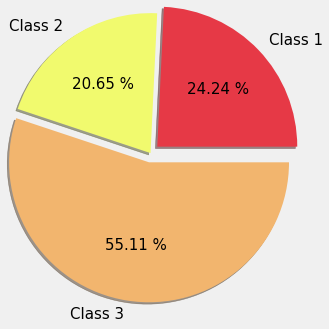

In [7]:
X = train.loc[train['Pclass']== 1].count()[0]         
Y = train.loc[train['Pclass']== 2].count()[0]       
Z = train.loc[train['Pclass']== 3].count()[0] 
labels = ['Class 1','Class 2', 'Class 3']

explode = [0.1, 0, 0.1] 

textprops = {"fontsize":'15'} 

autopct = '%.2f %%'
plt.style.use("fivethirtyeight")
# drawing pie chart
plt.pie(x=[X,Y,Z], labels=labels,colors=['#E63946', '#F1FA6E', '#F2B56E'] ,
        autopct=autopct, textprops=textprops, 
        explode=explode, radius=1.5,shadow=True) 
plt.show()

**Sex:**

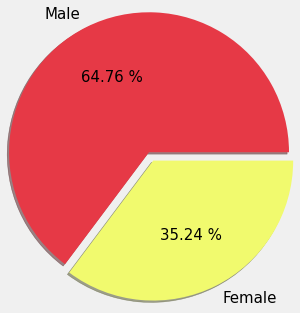

In [8]:
X = train.loc[train['Sex']== 'male'].count()[0]         
Y = train.loc[train['Sex']== 'female'].count()[0] 

labels = ['Male', 'Female']

explode = [0.1, 0] 

textprops = {"fontsize":'15'} 

autopct = '%.2f %%'
plt.style.use("fivethirtyeight")
# drawing pie chart
plt.pie(x=[X,Y], labels=labels,colors=['#E63946', '#F1FA6E'] ,
        autopct=autopct, textprops=textprops, 
        explode=explode, radius=1.5,shadow=True) 

plt.show()

**SibSp:**

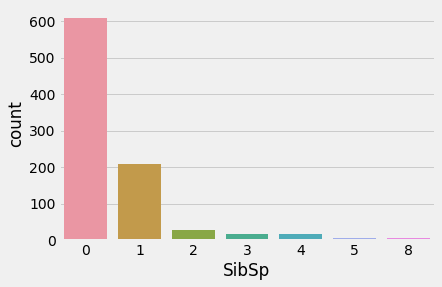

In [9]:
plt.style.use("fivethirtyeight")
sns.countplot(data=train, x='SibSp')
plt.show()

**Parch:**

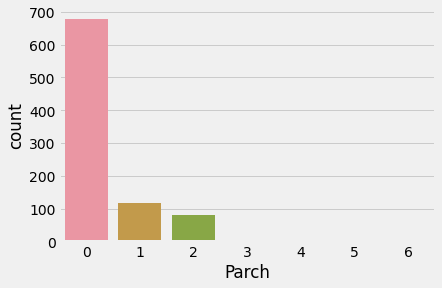

In [10]:
plt.style.use("fivethirtyeight")
sns.countplot(data=train, x='Parch')
plt.show()

**Fare:**

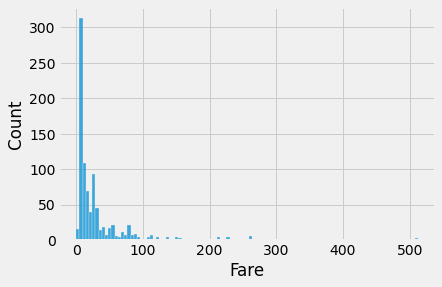

In [11]:
sns.histplot(data=train, x='Fare')
plt.show()

**Embarked:**

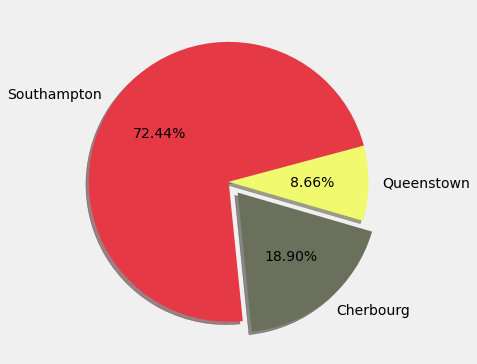

In [12]:
Y=train["Embarked"].value_counts()
myexplode=(0.0,0.1,0.0)
plt.style.use("fivethirtyeight")
mylabel=['Southampton','Cherbourg','Queenstown']
colors = ['#E63946', '#6b705c','#F1FA6E']
plt.pie(Y,labels=mylabel,autopct="%.2f%%",startangle=15,shadow=True,explode=myexplode,colors=colors)
plt.gcf().set_size_inches(12,6)
plt.show()

### **Feature Engineering:**

In [13]:
# calculate the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# replace nan value with median in the Age columns
train['Age'] = train.Age.fillna(train.Age.median())

# replacing nan value with mode in the Embarked columns
train['Embarked'] = train['Embarked'].fillna(train.Embarked.mode()[0])

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
categorical_feature = {feature for feature in train.columns if train[feature].dtypes != 'O'}
print(categorical_feature)

{'Pclass', 'Parch', 'SibSp', 'PassengerId', 'Fare', 'Survived', 'Age'}


In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# droping unwanted features for finding the person survived or not
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

##### **Encoding the categorical feature**

In [19]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
dic = {'male':0,'female':1}
train.Sex = train['Sex'].map(dic)

In [21]:
dic_emb = {'S': 0, 'C': 1, 'Q': 2}
train.Embarked = train.Embarked.map(dic_emb) 

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


#### **Apply same methods to test dataset**

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# replace nan value with median in the Age columns
test['Age'] = test.Age.fillna(test.Age.median())

# replacing nan value with mode in the Embarked columns
test['Fare'] = test['Fare'].fillna(test.Fare.median())

test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [27]:
dic = {'male':0,'female':1}
test.Sex = test['Sex'].map(dic)

dic_emb = {'S': 0, 'C': 1, 'Q': 2}
test.Embarked = test.Embarked.map(dic_emb)

test.Fare = test.Fare.fillna(test.Fare.median())

In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [29]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [30]:
X_train = train.drop(columns='Survived')
y_train = train[['Survived']]
X_test = test
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtypes)

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object
PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object
Survived    int64
dtype: object


In [31]:
submission.head()
print(submission.Survived.isnull().sum())

0


In [32]:
y_test = submission[['Survived']]
print(y_test.dtypes)

Survived    int64
dtype: object


### **Fit the dataset:**

In [33]:
# logistic Regressor
Lreg = LogisticRegression(C=0.7)
Lreg.fit(X_train, y_train)
lr_y_pred = Lreg.predict(X_test)
print(f"Accuracy Score: {accuracy_score(lr_y_pred, y_test)}")
print(f"Confusion matrix: {confusion_matrix(lr_y_pred, y_test)}")
print(f"classification report: {classification_report(lr_y_pred, y_test)}")

Accuracy Score: 0.9712918660287081
Confusion matrix: [[258   4]
 [  8 148]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       262
           1       0.97      0.95      0.96       156

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [34]:
# Ada boost classifier
Ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.8, algorithm='SAMME')
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"Confusion matrix: {confusion_matrix(y_pred, y_test)}")
print(f"classification report: {classification_report(y_pred, y_test)}")

Accuracy Score: 0.9712918660287081
Confusion matrix: [[259   5]
 [  7 147]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       264
           1       0.97      0.95      0.96       154

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [35]:
# RFclassifier
Rfc = RandomForestClassifier(criterion='gini',  min_samples_split=7, random_state=0, max_leaf_nodes=7)
Rfc.fit(X_train, y_train)
y_pred = Rfc.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"Confusion matrix: {confusion_matrix(y_pred, y_test)}")
print(f"classification report: {classification_report(y_pred, y_test)}")

Accuracy Score: 0.930622009569378
Confusion matrix: [[263  26]
 [  3 126]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.91      0.95       289
           1       0.83      0.98      0.90       129

    accuracy                           0.93       418
   macro avg       0.91      0.94      0.92       418
weighted avg       0.94      0.93      0.93       418



In [36]:
# GBclassifier
Gbc = GradientBoostingClassifier()
Gbc.fit(X_train, y_train)
y_pred = Gbc.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"Confusion matrix: {confusion_matrix(y_pred, y_test)}")
print(f"classification report: {classification_report(y_pred, y_test)}")

Accuracy Score: 0.8253588516746412
Confusion matrix: [[236  43]
 [ 30 109]]
classification report:               precision    recall  f1-score   support

           0       0.89      0.85      0.87       279
           1       0.72      0.78      0.75       139

    accuracy                           0.83       418
   macro avg       0.80      0.82      0.81       418
weighted avg       0.83      0.83      0.83       418



In [37]:
# SVclassifier
Svc = SVC()
Svc.fit(X_train, y_train)
y_pred = Svc.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"Confusion matrix: {confusion_matrix(y_pred, y_test)}")
print(f"classification report: {classification_report(y_pred, y_test)}")

Accuracy Score: 0.6483253588516746
Confusion matrix: [[260 141]
 [  6  11]]
classification report:               precision    recall  f1-score   support

           0       0.98      0.65      0.78       401
           1       0.07      0.65      0.13        17

    accuracy                           0.65       418
   macro avg       0.52      0.65      0.45       418
weighted avg       0.94      0.65      0.75       418



In [38]:
submission= pd.DataFrame({'PassengerId': submission['PassengerId'], 'Survived': lr_y_pred})

In [40]:
submission.to_csv('submission.csv', index=False)